<p align="center"><b><font size="6"> Macine Learning in practice</b></p>

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
random_seed = 42
import matplotlib.pyplot as plt
from transformers import pipeline

/Users/alexandresani/Library/CloudStorage/OneDrive-Personnel/Scolaire/Columbia/Spring 2025/ML in practice/PROJECT/ML in practice Github/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
labelling_budgets=[16, 32, 64, 128, 256, 512, 1024]

# Data Processing

In [4]:
# IMDB Movie Reviews
train_path = "Raw Data/IMDB Movie Reviews/train_dataset.csv"
test_path = "Raw Data/IMDB Movie Reviews/test_dataset.csv"
unsupervised_path = "Raw Data/IMDB Movie Reviews/unsupervised_dataset.csv"

IMDB_train = pd.read_csv(train_path)
IMDB_test = pd.read_csv(test_path)
IMDB_unsupervised = pd.read_csv(unsupervised_path)


#Wikipedia Comments
wiki_comments_path = "Raw Data/Wikipedia Personal Attacks/attack_annotated_comments.tsv"
wiki_annotations_path = "Raw Data/Wikipedia Personal Attacks/attack_annotations.tsv"
wiki_keywords_path = "Raw Data/Wikipedia Personal Attacks/keywords.csv"

wiki_comments = pd.read_csv(wiki_comments_path, sep='\t')
wiki_annotations = pd.read_csv(wiki_annotations_path, sep='\t')
keywords = pd.read_csv(wiki_keywords_path)


In [5]:
wiki_comments

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train
...,...,...,...,...,...,...,...
115859,699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
115860,699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
115861,699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train
115862,699891012,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,dev


In [6]:
wiki_annotations

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1365212,699897151,628,0.0,0.0,0.0,0.0,0.0
1365213,699897151,15,0.0,0.0,0.0,0.0,0.0
1365214,699897151,57,0.0,0.0,0.0,0.0,0.0
1365215,699897151,1815,0.0,0.0,0.0,0.0,0.0


In [7]:
# cols = ['rev_id', 'worker_id', 'attack']
# wiki_data = wiki_annotations[cols].copy()
# wiki_data['comment'] = wiki_data['rev_id'].apply(lambda x: wiki_comments[wiki_comments['rev_id']==x]['comment'].values[0])

# wiki_data

In [8]:
cols = ['rev_id', 'comment', 'split']
wiki_data = wiki_comments[cols].copy()
wiki_data['label'] = wiki_data['rev_id'].map(
    wiki_annotations.groupby('rev_id')['attack'].mean().round().astype(int)
)
wiki_data["comment"] = wiki_data["comment"].str.replace("NEWLINE_TOKEN", "")
wiki_data = wiki_data.rename(columns={"comment": "text"})
wiki_data

,rev_id,text,split,label
0,37675,`-This is not ``creative``. Those are the dic...,train,0
1,44816,`:: the term ``standard model`` is itself less...,train,0
2,49851,"True or false, the situation as of March 2002 ...",train,0
3,89320,"Next, maybe you could work on being less cond...",dev,0
4,93890,This page will need disambiguation.,train,0
...,...,...,...,...
115859,699848324,`These sources don't exactly exude a sense of ...,train,0
115860,699851288,The Institute for Historical Review is a peer-...,test,0
115861,699857133,:The way you're trying to describe it in this ...,train,0
115862,699891012,== Warning ==There is clearly a protectionist ...,dev,0


In [9]:
# wiki_data["comment"] = wiki_data["comment"].str.replace("NEWLINE_TOKEN", "")
# wiki_data = wiki_data.drop(columns=["ns", "sample", "year"])
# wiki_data = wiki_data.rename(columns={"logged_in": "label"})
# wiki_data = wiki_data.rename(columns={"comment": "text"})
# wiki_data["label"] = wiki_data["label"].map({False: 0, True: 1})

In [10]:
wiki_train = wiki_data[wiki_data['split'] == 'train']
wiki_train = wiki_train.drop(columns=["split"])
wiki_train
print(wiki_train['label'].value_counts())

wiki_test = wiki_data[wiki_data['split'] == 'test']
wiki_test = wiki_test.drop(columns=["split"])
print(wiki_test['label'].value_counts())

wiki_dev = wiki_data[wiki_data['split'] == 'dev']
wiki_dev = wiki_dev.drop(columns=["split"])
print(wiki_dev['label'].value_counts())

label
0    61447
1     8079
Name: count, dtype: int64
label
0    20422
1     2756
Name: count, dtype: int64
label
0    20405
1     2755
Name: count, dtype: int64


### Unbalanced dataset for IMDB

In [11]:
def unbalanced(df,p):
    df_neg = df[df['label'] == 0]
    df_pos = df[df['label'] == 1]
    
    n_pos = round(len(df_neg)*p/(1-p))
    df_pos = df_pos.sample(n=n_pos)
    df_unbalanced = pd.concat([df_neg, df_pos])

    # Shuffle
    df_unbalanced = df_unbalanced.sample(frac=1, random_state=42)
    
    print(df_unbalanced["label"].value_counts(normalize=True))
    print(len(df_unbalanced))
    return df_unbalanced

In [12]:
p=0.1

IMDB_train_balanced = IMDB_train
IMDB_train_unbalanced = unbalanced(IMDB_train, p)

IMDB_test_2, IMDB_dev =train_test_split(IMDB_test, test_size=0.5, random_state=42)

IMDB_test_balanced = IMDB_test_2
IMDB_test_unbalanced = unbalanced(IMDB_test_2, p)

IMDB_dev_balanced = IMDB_dev
IMDB_dev_unbalanced = unbalanced(IMDB_dev, p)

label
0    0.899993
1    0.100007
Name: proportion, dtype: float64
13889
label
0    0.9
1    0.1
Name: proportion, dtype: float64
6880
label
0    0.899986
1    0.100014
Name: proportion, dtype: float64
7009


In [13]:
imdb_datasets = {
    "train_balanced": IMDB_train_balanced,
    "train_unbalanced": IMDB_train_unbalanced,
    "test_balanced": IMDB_test_balanced,
    "test_unbalanced": IMDB_test_unbalanced,
    "dev_balanced": IMDB_dev_balanced,
    "dev_unbalanced": IMDB_dev_unbalanced
}

imdb_datasets["train_balanced"],imdb_datasets["test_balanced"]

(                                                    text  label
 0      I rented I AM CURIOUS-YELLOW from my video sto...      0
 1      "I Am Curious: Yellow" is a risible and preten...      0
 2      If only to avoid making this type of film in t...      0
 3      This film was probably inspired by Godard's Ma...      0
 4      Oh, brother...after hearing about this ridicul...      0
 ...                                                  ...    ...
 24995  A hit at the time but now better categorised a...      1
 24996  I love this movie like no other. Another time ...      1
 24997  This film and it's sequel Barry Mckenzie holds...      1
 24998  'The Adventures Of Barry McKenzie' started lif...      1
 24999  The story centers around Barry McKenzie who mu...      1
 
 [25000 rows x 2 columns],
                                                     text  label
 12204  This movie is a nonsense/spoof comedy, in the ...      0
 2655   "The New hope of Romanian cinema"...if this is...    

### Balanced dataset for Wikipedia

In [14]:
def balanced(df):
    df_neg = df[df['label'] == 0]
    df_pos = df[df['label'] == 1]
    
    n_neg = len(df_pos)
    df_neg=df_neg.sample(n=n_neg)
    df_balanced = pd.concat([df_neg, df_pos])
    
    # Shuffle
    df_balanced = df_balanced.sample(frac=1, random_state=random_seed)
    
    print(df_balanced["label"].value_counts(normalize=True))
    print(len(df_balanced))
    return df_balanced

In [15]:
wiki_train_unbalanced = wiki_train
wiki_test_unbalanced = wiki_test
wiki_dev_unbalanced = wiki_dev

wiki_train_balanced = balanced(wiki_train_unbalanced)
wiki_test_balanced = balanced(wiki_test_unbalanced)
wiki_dev_balanced = balanced(wiki_dev_unbalanced)

label
0    0.5
1    0.5
Name: proportion, dtype: float64
16158
label
1    0.5
0    0.5
Name: proportion, dtype: float64
5512
label
0    0.5
1    0.5
Name: proportion, dtype: float64
5510


In [16]:
wiki_datasets = {
    "train_unbalanced": wiki_train_unbalanced,
    "test_unbalanced": wiki_test_unbalanced,
    "dev_unbalanced": wiki_dev_unbalanced,
    "train_balanced": wiki_train_balanced,
    "test_balanced": wiki_test_balanced,
    "dev_balanced": wiki_dev_balanced,
}

wiki_train_unbalanced

,rev_id,text,label
0,37675,`-This is not ``creative``. Those are the dic...,0
1,44816,`:: the term ``standard model`` is itself less...,0
2,49851,"True or false, the situation as of March 2002 ...",0
4,93890,This page will need disambiguation.,0
5,102817,-Important note for all sysops: There is a bug...,0
...,...,...,...
115854,699756185,`The lead itself is original research. Where i...,0
115856,699813325,`::I'm talking about you making unjustified ma...,0
115859,699848324,`These sources don't exactly exude a sense of ...,0
115861,699857133,:The way you're trying to describe it in this ...,0


# Naive Bayes

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score

def train_and_evaluate_nb(df_train, df_test,n=-1, text_col='text', label_col='label', random_seed=random_seed):

    df_train = df_train.dropna(subset=[text_col])
    df_test = df_test.dropna(subset=[text_col])
    if n > 0:
        df_train = df_train.sample(n=n, random_state=random_seed).reset_index(drop=True)
    # Extraction des textes et labels
    X_train_texts = df_train[text_col]
    y_train = df_train[label_col]

    X_test_texts = df_test[text_col]
    y_test = df_test[label_col]

    # Vectorisation du texte avec TF-IDF
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train_texts)
    X_test = vectorizer.transform(X_test_texts)

    # Entraînement du modèle Naive Bayes
    model_nb = MultinomialNB()
    model_nb.fit(X_train, y_train)

    # Prédictions et évaluation
    preds = model_nb.predict(X_test)
    #print("=== Évaluation du modèle ===")
    #print("Accuracy:", accuracy_score(y_test, preds))
    #print(classification_report(y_test, preds))

    f1_val = f1_score(y_test, preds, average='macro')

    return model_nb, f1_val,



In [18]:
model_nb, f1_scor = train_and_evaluate_nb(IMDB_train, IMDB_test)

print("=== Score F1 ===")
print(f1_scor)

=== Score F1 ===
0.8289532297820281


In [19]:
def plot_model_performance_by_budget(
    datasets_dict,
    model_fn,
    model_name="Naive Bayes",
    labelling_budgets= labelling_budgets,
    colors=("blue", "red", "green")
):

    f1_score_Balanced = []
    f1_score_HalfBalanced = []
    f1_score_UnBalanced = []

    for budget in labelling_budgets:
        # (a) Balanced train + balanced test
        _, f1 = model_fn(datasets_dict["train_balanced"], datasets_dict["test_balanced"], budget)
        f1_score_Balanced.append(f1)

        # (b) Balanced train + unbalanced test
        _, f1 = model_fn(datasets_dict["train_balanced"], datasets_dict["test_unbalanced"], budget)
        f1_score_HalfBalanced.append(f1)

        # (c) Unbalanced train + unbalanced test
        _, f1 = model_fn(datasets_dict["train_unbalanced"], datasets_dict["test_unbalanced"], budget)
        f1_score_UnBalanced.append(f1)

    # --- Plotting ---
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

    axes[0].plot(labelling_budgets, f1_score_Balanced, marker='o', color=colors[0], label=model_name)
    axes[0].set_title('(a) Balanced train and balanced test')
    axes[0].set_xlabel('Labelling budget')
    axes[0].set_ylabel('Macro F1 Score')
    axes[0].set_ylim(0, 1.0)
    axes[0].grid(True)
    axes[0].legend()

    axes[1].plot(labelling_budgets, f1_score_HalfBalanced, marker='o', color=colors[1], label=model_name)
    axes[1].set_title('(b) Balanced train and unbalanced test')
    axes[1].set_xlabel('Labelling budget')
    axes[1].set_ylim(0, 1.0)
    axes[1].grid(True)
    axes[1].legend()

    axes[2].plot(labelling_budgets, f1_score_UnBalanced, marker='o', color=colors[2], label=model_name)
    axes[2].set_title('(c) Unbalanced train and unbalanced test')
    axes[2].set_xlabel('Labelling budget')
    axes[2].set_ylim(0, 1.0)
    axes[2].grid(True)
    axes[2].legend()

    plt.tight_layout()
    plt.show()

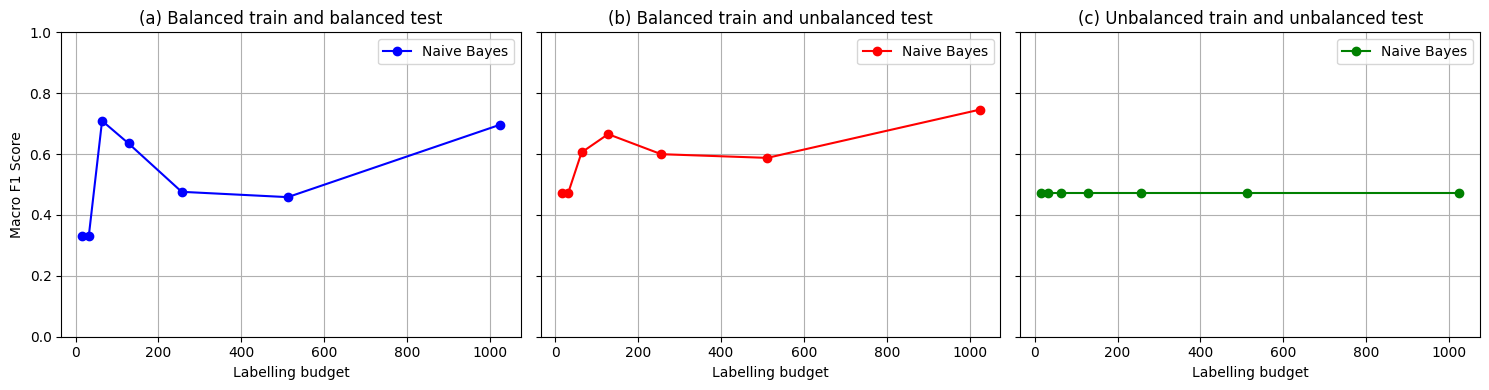

In [20]:
plot_model_performance_by_budget(imdb_datasets,train_and_evaluate_nb)

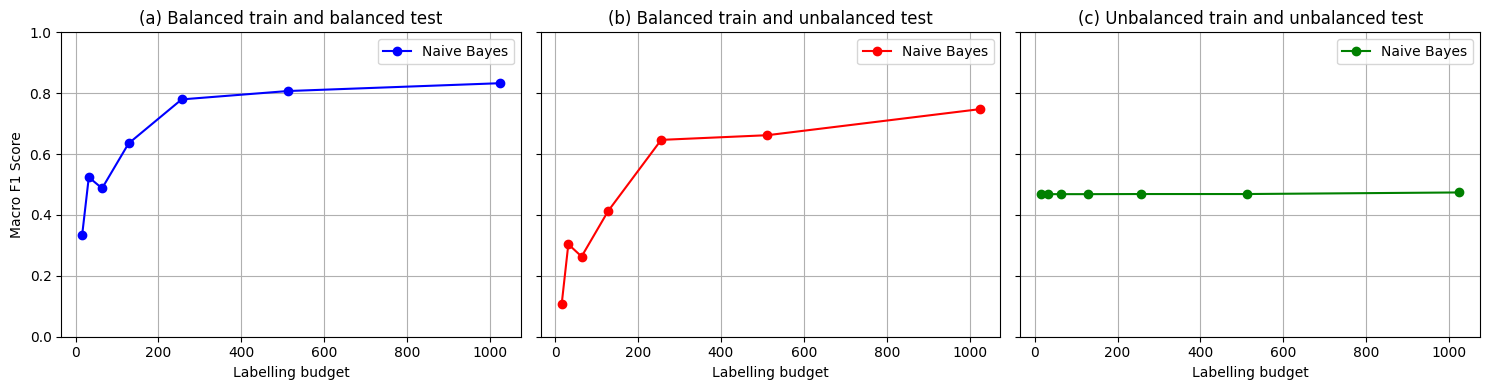

In [21]:
plot_model_performance_by_budget(wiki_datasets,train_and_evaluate_nb)

# Weak Supervision

## Labeling Functions

In [22]:
# Importation

import pandas as pd
import datetime as dt
import numpy as np
import re
import nltk
#nltk.download('wordnet')
from nltk.corpus import wordnet
from snorkel.labeling import LabelingFunction, labeling_function
from snorkel.preprocess import preprocessor
from textblob import TextBlob
import operator as op
from typing import Callable


# Global Variables

ABUSE = 1
NOT_ABUSE = 0
ABSTAIN = -1

lfs = dict()


# NLP Labeling Functions

### Preprocessors
@preprocessor(memoize=True)
def textblob_polarity(x):
    scores = TextBlob(x.text)
    x.polarity = scores.polarity
    return x

@preprocessor(memoize=True)
def textblob_subjectivity(x):
    scores = TextBlob(x.text)
    x.subjectivity = scores.subjectivity
    return x

### NLP labeling functions

def lfg_polarity(op_func: Callable[[float, float], bool],
                bound: float,                  
                CONSTANT: int,
                name: str = 'polarityLabelingFunction',
                ABSTAIN: int = -1
                ):
    def lf_polarity(x):
        return CONSTANT if op_func(x.polarity, bound) else ABSTAIN
    return LabelingFunction(name=name, f=lf_polarity, pre=[textblob_polarity])

def lfg_subjectivity(op_func: Callable[[float, float], bool],
                    bound: float,
                    CONSTANT: int,
                    name: str = 'subjectivityLabelingFunction',
                    ABSTAIN: int = -1,
                    ):
    def lf_subjectivity(x):
        return CONSTANT if op_func(x.subjectivity, bound) else ABSTAIN
    return LabelingFunction(name=name, f=lf_subjectivity, pre=[textblob_subjectivity])





# Heuristic labeling functions

### length labeling function
def lfg_lengthtext(min_characters: int,
                            op_func: Callable[[float, float], bool],
                            CONSTANT: int,
                            name: str = 'lengthtextLabelingFunction',
                            ABSTAIN: int = -1):
    def lf_lengthtext(x):
        return CONSTANT if op_func(len(x.text), min_characters) else ABSTAIN
    return LabelingFunction(name=name, f=lf_lengthtext)

### Keyword labeling function
def lfg_keywords(keywords: list, 
                          CONSTANT: int, 
                          name: str = 'keywordsLabelingFunction',
                          ABSTAIN: int = -1):
    @labeling_function()
    def func(x):
        return CONSTANT if any(word in x.text.lower() for word in keywords) else ABSTAIN
    func.name = name
    return func

### Regex labeling function


def lfg_regex(regex, 
                       CONSTANT: int, 
                       name: str = 'regexLabelingFunction',
                       ABSTAIN: int = -1):
    @labeling_function()
    def func(x):
        return CONSTANT if re.search(regex, x.text.lower(), flags=re.I) else ABSTAIN
    func.name = name
    return func



# Annotators Labeling Functions

def worker_lf(x, worker_dict):
    return worker_dict.get(x.rev_id, ABSTAIN)

def lfg_worker(worker_id, worker_dicts):
    worker_dict = worker_dicts[worker_id]
    name = f"worker_{worker_id}"
    return LabelingFunction(name, f=worker_lf, resources={"worker_dict": worker_dict})



# Helper functions

def load_annotations(path: str) -> pd.DataFrame:
    annotations = pd.read_table(path)
    return annotations

def load_keywords(path: str) -> pd.DataFrame:
    keywords = pd.read_csv(path).keyword.values
    return keywords

def get_worker_dicts(annotations: pd.DataFrame) -> dict:

    labels_by_annotator = annotations.groupby("worker_id")
    worker_dicts = {}
    for worker_id in labels_by_annotator.groups:
        worker_df = labels_by_annotator.get_group(worker_id)[["rev_id", "attack"]]
        worker_dicts[worker_id] = dict(zip(worker_df.rev_id, worker_df.attack))
    return worker_dicts


# Get lfs

def get_lfs(path_keywords: str, path_annotations: str) -> dict:
    lfs = dict()

    lfs['polarity_negative'] = lfg_polarity(op.lt, -0.25, ABUSE, name='polarity_negative')
    lfs['polarity_positive'] = lfg_polarity(op.ge, 0.1, NOT_ABUSE, name='polarity_positive')

    lfs['length_text'] = lfg_lengthtext(9500, op.gt, ABUSE)

    badwords = load_keywords(path_keywords)
    lfs['badwords'] = lfg_keywords(badwords, ABUSE)

    annotations = load_annotations(path_annotations)
    worker_dicts = get_worker_dicts(annotations)
    for worker_id in worker_dicts:
        name = f"worker_{worker_id}"
        lfs[name] = lfg_worker(worker_id, worker_dicts)

    return lfs


# Wordnet expansion

badwords = []
for word in ['bad', 'worst', 'horrible', 'ridiculous', 'appaling', 'long', 'boring', 
             'predictable', 'tiring', 'non-credible']:
    for syn in wordnet.synsets(word):
        for i in syn.lemmas():
             badwords.append(i.name())
                
badwords = [s.lower().replace('_', ' ') for s in np.unique(np.array(badwords))]

goodwords = []
for word in ['good', 'best', 'marvelous', 'incredible', 'mesmerizing', 'entertaining', 
             'unforgettable', 'beautiful', 'cute', 'deep']:
    for syn in wordnet.synsets(word):
        for i in syn.lemmas():
             goodwords.append(i.name())
                
goodwords = [s.lower().replace('_', ' ') for s in np.unique(np.array(goodwords))]



# IMDB specific

def lfg_regex2(keywords, 
               CONSTANT: int, 
               name: str = 'regexLabelingFunction',
               specific_keywords = ['act', 'sound', 'edit', 'direct', 'film', 'picture'],
               ABSTAIN: int = -1):
    
    @labeling_function()
    def func(x):
        for word in specific_keywords:
            for keyword in keywords:
                if re.search(f"({keyword}|{word})"+"\W+(?:\w+\W+){0,2}?"+f"({keyword}|{word})", x.text.lower(), flags=re.I):
                    return CONSTANT 
        return ABSTAIN
    func.name = name
    return func



# for binary_movie sentiment, labels are inverted
def get_lfs_imdb(treshold_abuse: float = -0.05, treshold_notabuse: float = 0., treshold_subjectivity: float = 0.3) -> dict:
    lfs = dict()

    lfs['polarity_negative'] = lfg_polarity(op.lt, treshold_abuse, NOT_ABUSE, name='polarity_negative')
    lfs['polarity_positive'] = lfg_polarity(op.ge, treshold_notabuse, ABUSE, name='polarity_positive')

    lfs['subjectivity'] = lfg_subjectivity(op.lt, treshold_subjectivity, ABUSE, name='subjectivity')

    lfs['badwords'] = lfg_keywords(badwords, NOT_ABUSE, name='badwords')
    lfs['goodwords'] = lfg_keywords(goodwords, ABUSE, name='goodwords')

    lfs['good_acting'] = lfg_regex2(goodwords, NOT_ABUSE, name='good_acting')
    lfs['bad_acting'] = lfg_regex2(badwords, ABUSE, name='bad_acting')

    return lfs

<>:193: SyntaxWarning: invalid escape sequence '\W'
<>:193: SyntaxWarning: invalid escape sequence '\W'
/var/folders/_b/wqf3m3057cs_qy4w8m9vy3_40000gn/T/ipykernel_27596/994043334.py:193: SyntaxWarning: invalid escape sequence '\W'
  if re.search(f"({keyword}|{word})"+"\W+(?:\w+\W+){0,2}?"+f"({keyword}|{word})", x.text.lower(), flags=re.I):


## Wikipedia data

In [31]:
from snorkel.labeling import PandasLFApplier
from snorkel.labeling.model.label_model import LabelModel

sampledataset = lambda df, n: df.sample(n=n, random_state=random_seed).reset_index(drop=True) if n>=0 else df

# Data

lfs_dict = get_lfs(wiki_keywords_path, wiki_annotations_path)

# def lf_applier(lf_dict, dftrain, dftest, n=-1):
#     lf = list(lf_dict.values())
#     applier = PandasLFApplier(lf)

#     train = sampledataset(dftrain, n)
#     test = dftest

#     L_train = applier.apply(train)
#     L_test = applier.apply(test)
#     return L_train, L_test, train, test

def lf_applier(lf_dict, df, n=-1):
    lf = list(lf_dict.values())
    applier = PandasLFApplier(lf)

    dfl = sampledataset(df, n)

    L = applier.apply(dfl)

    return L, dfl

def labelmodel(ltrain, ltest, dftest, nepochs=100, nclass=2, rdseed=random_seed, logfreq=10, tiebreakpolicy='random'):
    label_model = LabelModel(cardinality=nclass, verbose=False)
    label_model.fit(ltrain,n_epochs=nepochs, log_freq=logfreq, seed=rdseed)
    y_test = dftest['label'].values
    y_pred = label_model.predict(L=ltest, tie_break_policy=tiebreakpolicy)
    return (y_test, y_pred)

#list(lfs_dict.values())

In [24]:
# f1=[]
# for budget in labelling_budgets:
#     L_train, L_test, train, test = lf_applier(lfs_dict, wiki_train_unbalanced, wiki_test_unbalanced, n=budget)
#     ytest, ypred = labelmodel(L_train, L_test, test, nepochs=5)
#     f1val = f1_score(ytest, ypred, average='macro')
#     f1.append(f1val)

# plt.plot(labelling_budgets, f1)
# plt.show()

In [ ]:
def plot_model_performance_by_budget_weak_supervision(
    datasets_dict,
    lf_dict,
    applier_fn,
    model_fn,
    model_name="weak_supervision",
    labelling_budgets= labelling_budgets,
    colors=("blue", "red", "green")
):

    f1_score_Balanced = []
    f1_score_HalfBalanced = []
    f1_score_UnBalanced = []

    f1s = lambda ytest, ypred: f1_score(ytest, ypred, average='macro')

    ltest_balanced, testb = applier_fn(lf_dict, datasets_dict['test_balanced'])
    ltest_unbalanced, testub = applier_fn(lf_dict, datasets_dict['test_unbalanced'])

    preds_dict = {
        'balanced':{},
        'halfbalanced':{},
        'unbalanced':{}
    }

    for budget in labelling_budgets:
        # (a) Balanced train + balanced test
        ltrain_balanced, trainb = applier_fn(lf_dict, datasets_dict['train_balanced'], n=budget)
        ytest_balanced, ypred_balanced = model_fn(ltrain_balanced, ltest_balanced, testb)
        preds_dict['balanced'][budget] = [ytest_balanced, ypred_balanced]
        f1_score_Balanced.append(f1s(ytest_balanced, ypred_balanced))

        # (b) Balanced train + unbalanced test
        ytest_halfbalanced, ypred_halfbalanced = model_fn(ltrain_balanced, ltest_unbalanced, testub)
        preds_dict['halfbalanced'][budget] = [ytest_halfbalanced, ypred_halfbalanced]
        f1_score_HalfBalanced.append(f1s(ytest_halfbalanced, ypred_halfbalanced))

        # (c) Unbalanced train + unbalanced test
        ltrain_unbalanced, trainub = applier_fn(lf_dict, datasets_dict['train_unbalanced'], n=budget)
        ytest_unbalanced, ypred_unbalanced = model_fn(ltrain_unbalanced, ltest_unbalanced, testub)
        preds_dict['unbalanced'][budget] = [ytest_unbalanced, ypred_unbalanced]
        f1_score_UnBalanced.append(f1s(ytest_unbalanced, ypred_unbalanced))

    # --- Plotting ---
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

    axes[0].plot(labelling_budgets, f1_score_Balanced, marker='o', color=colors[0], label=model_name)
    axes[0].set_title('(a) Balanced train and balanced test')
    axes[0].set_xlabel('Labelling budget')
    axes[0].set_ylabel('Macro F1 Score')
    axes[0].set_ylim(0, 1.0)
    axes[0].grid(True)
    axes[0].legend()

    axes[1].plot(labelling_budgets, f1_score_HalfBalanced, marker='o', color=colors[1], label=model_name)
    axes[1].set_title('(b) Balanced train and unbalanced test')
    axes[1].set_xlabel('Labelling budget')
    axes[1].set_ylim(0, 1.0)
    axes[1].grid(True)
    axes[1].legend()

    axes[2].plot(labelling_budgets, f1_score_UnBalanced, marker='o', color=colors[2], label=model_name)
    axes[2].set_title('(c) Unbalanced train and unbalanced test')
    axes[2].set_xlabel('Labelling budget')
    axes[2].set_ylim(0, 1.0)
    axes[2].grid(True)
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    return preds_dict



100%|██████████| 100/100 [00:53<00:00,  1.87epoch/s]


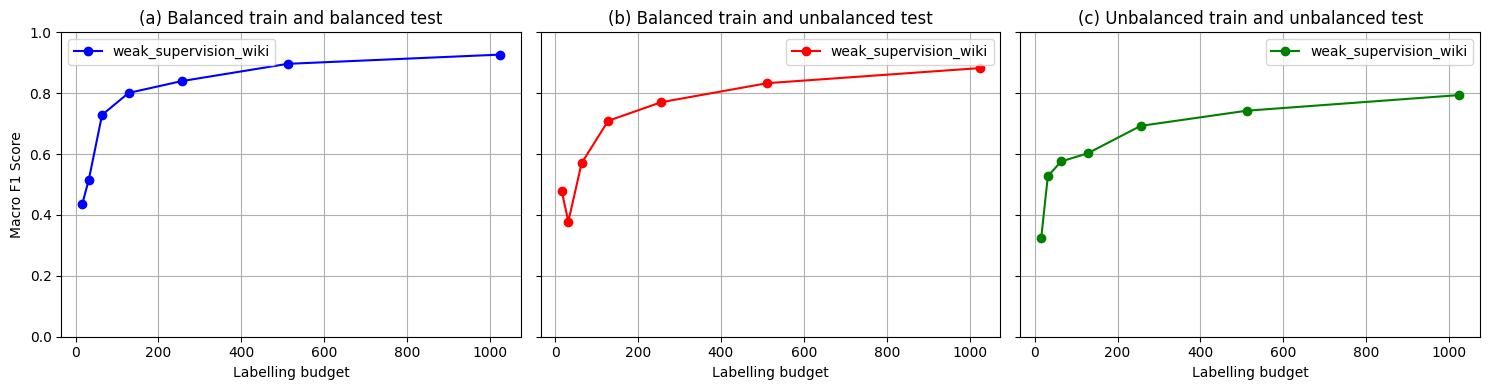

In [33]:
plot_model_performance_by_budget_weak_supervision(
    wiki_datasets,
    lfs_dict,
    lf_applier,
    labelmodel,
    'weak_supervision_wiki'
)

## IMDB data

100%|██████████| 100/100 [00:00<00:00, 5599.50epoch/s]


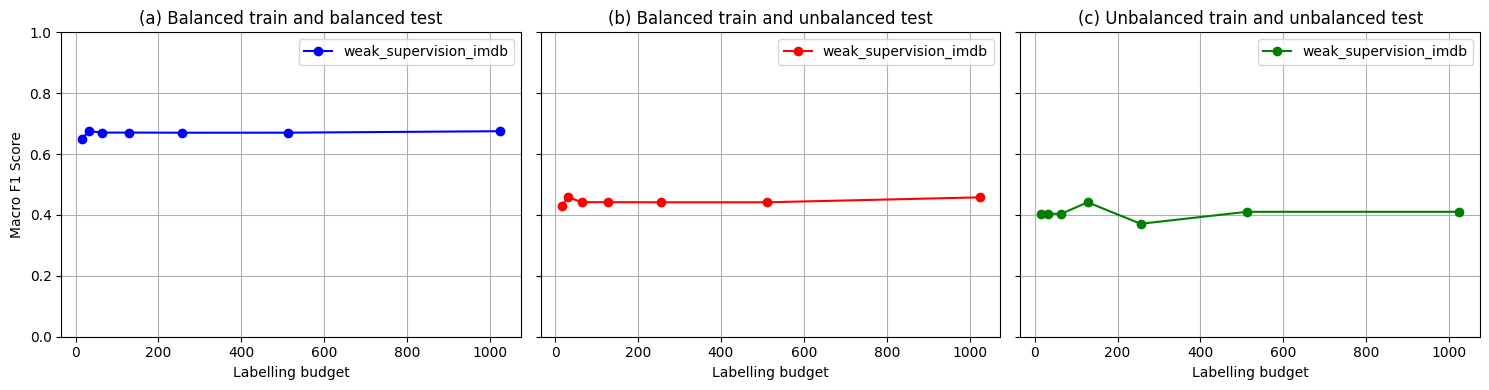

In [34]:
lfs_dict_imdb = get_lfs_imdb()

plot_model_performance_by_budget_weak_supervision(
    imdb_datasets,
    lfs_dict_imdb,
    lf_applier,
    labelmodel,
    'weak_supervision_imdb'
)

# Transfer Learning

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base")
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-base", num_labels=2)

from datasets import Dataset

dataset_train = Dataset.from_pandas(IMDB_train_balanced[['text', 'label']])
dataset_test = Dataset.from_pandas(IMDB_test_balanced[['text', 'label']])

In [ ]:
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding="max_length",   max_length=512)

tokenized_train = dataset_train.map(tokenize_function, batched=True)
tokenized_test = dataset_test.map(tokenize_function, batched=True)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    num_train_epochs=3
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test
)

trainer.train()

# Prompt Engineering

In [ ]:
pip install openai

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
    model="gpt-4.1",
    input="Write a one-sentence bedtime story about a unicorn."
)

print(response.output_text)